In [44]:
import os
from spoa import poa

In [45]:
print(__doc__)

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import Levenshtein
import csv
import pandas as pd

Automatically created module for IPython interactive environment


In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [47]:
# Distance metric
def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])
    return (Levenshtein.distance(b1[i], b1[j]))

In [48]:
df = pd.read_csv("~/Desktop/align/knx.csv")
b1 = df.Protocols.to_list()

In [49]:
X1 = np.arange(len(b1)).reshape(-1, 1) 

In [50]:
# Defining DBSCAN Parameters and clustering
db = DBSCAN(eps = 2, min_samples = 2, metric = lev_metric)
predictions = db.fit_predict(X1)

Text(0.5, 1.0, 'DBSCAN')

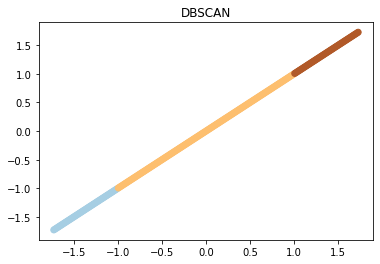

In [51]:
ss = StandardScaler()
X = ss.fit_transform(X1)
db = DBSCAN(eps = 2, min_samples = 2, metric = lev_metric)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X[:,0], X[:,],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [52]:
# Printing results 
tmp = pd.DataFrame({'messages': b1, 'cluster_id': predictions})
tmp.sort_values(by = ['cluster_id'], ascending = True, inplace = True)
print (tmp)

                   messages  cluster_id
77       BCE0362B0321000081          -1
37   BCE03619128C0200800136          -1
38   BCE0361C12A50200800136          -1
15   BCE0362712F00200802710          -1
13   BCE0361612B60200800CDB          -1
..                      ...         ...
200  BCE0361612B60200800D14          12
245  BCE0361612B60200800D14          12
128  BCE0362712F00200800000          13
206  BCE0362712F00200800000          13
217  BCE0362712F00200800000          13

[265 rows x 2 columns]


In [53]:
df_group = (tmp.groupby(['cluster_id'])['messages'].apply(','.join).reset_index())

In [54]:
df_group

,cluster_id,messages
0,-1,"BCE0362B0321000081,BCE03619128C0200800136,BCE0..."
1,0,"BCE036191290000081,BCE036191281000080,BCE03619..."
2,1,"BCE0361C129D0200800CA9,BCE0361C129D0200800CA9"
3,2,"BCE0361612B20200800CAD,BCE0361612B20200800CB1,..."
4,3,"BCE03619128C02008009C4,BCE03619128C0200800000,..."
5,4,"BCE0361C12A502008009C4,BCE0361C12A50200800000,..."
6,5,"BCE0361612BE0200800000,BCE0361612BE0200800000,..."
7,6,"BCE0361012670200800CA7,BCE03610126B0200800C1A,..."
8,7,"BCE0362712E80200800D14,BCE0362712E80200800D14"
9,8,"BCE0362712E40200800CBC,BCE0362712E80200800CB0,..."


In [55]:
#for cluster of 0 index
print(df_group.loc[0]['messages'].split(","))

['BCE0362B0321000081', 'BCE03619128C0200800136', 'BCE0361C12A50200800136', 'BCE0362712F00200802710', 'BCE0361612B60200800CDB', 'BCE03610127302008004F6', 'BCE0361912840200800CA9']


In [56]:
#number of items in each cluster
tmp['cluster_id'].value_counts()

 8     44
 9     38
 6     33
 0     31
 2     30
 4     28
 3     25
 12    12
-1      7
 5      5
 13     3
 10     3
 1      2
 11     2
 7      2
Name: cluster_id, dtype: int64

In [66]:
for i,item in df_group.iterrows():
    x = df_group.loc[i]['messages'].split(",")
    consensus, msa = poa(x)
    print(consensus)
    #print(msa)

BCE0361912840200800136
BCE036191281000081
BCE0361C129D0200800CA9
BCE0361612B20200800CAF
BCE03619128C02008009C4
BCE0361C12A502008009C4
BCE0361612BE0200800000
BCE03610126B0200800C1A
BCE0362712E80200800D14
BCE0362712E80200800CB0
BCE0362E094C000080
BCE0361012730200800000
BCE0361C129D0200800D14
BCE0361612B60200800D14
BCE0362712F00200800000
